In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed, uniform, randn
from scipy.stats import norm

In [2]:
def ker_reg(x,X,t,sigma):
    pdf_vals = norm.pdf(x - X.reshape(10,1), loc = 0, scale = sigma).T
    pdf_vals = pdf_vals/(pdf_vals.sum(axis = 1,keepdims=True))
    exp= (pdf_vals * t.reshape(1,10)).sum(axis = 1)
    CVar = np.sqrt(sigma **2 +  (pdf_vals * t.reshape(1,10) **2).sum(axis = 1) - exp **2)
    return exp, CVar

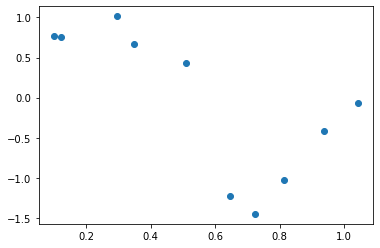

In [3]:
seed(1500) 
X = np.linspace(0, 1, 10) + uniform(size=10) * 0.1
t = np.sin(2 * np.pi * X) + randn(10) * 0.4
target = np.sin(2 * np.pi * X)
plt.scatter(X,t)
plt.show()

Text(0.5, 0.98, 'Kernel Regression')

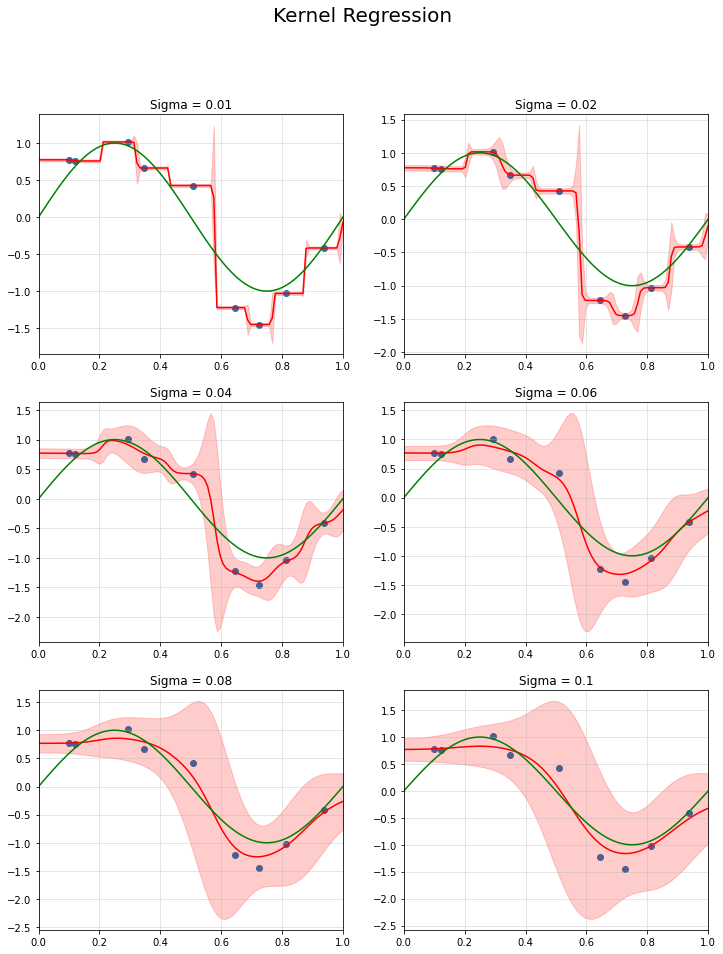

In [4]:
x = np.linspace(0,1,100) 
sigmas = [0.01, 0.02, 0.04, 0.06, 0.08 , 0.1]
fig, axes = plt.subplots(3,2, figsize=(12,15))
for sigma, axis in zip(sigmas, axes.ravel()):
    exp,CVar = ker_reg(x,X,t,sigma)
    axis.scatter(X,t)
    axis.plot(x,exp,color='red')
    axis.fill_between(x,exp - 2*CVar, exp + 2*CVar, alpha = 0.2, color='red')
    axis.plot(x,np.sin(2*np.pi*x), color="green")
    axis.grid(alpha=0.4)
    axis.set_title("Sigma = " f"{sigma}")
    axis.set_xlim(0, 1);
plt.suptitle("Kernel Regression", fontsize = 20)